## Лабораторная работа №1
Выполнила: Вельтман Л.Я.

Группа: М8О-307Б-17

Преподаватель: Самир Ахмед

### Первый датасет

Для выполнения данной лабораторной я выбрала датасет болезней сердца, так как он наиболее подходит для задачи классификации. База данных содержит 76 атрибутов, таких как возраст, пол, тип боли в груди, артериальное давление в покое и другие.

Импортируем необходимые для работы библиотеки.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

Считываем данные и выведем первые 5 строк для визуализации.

In [2]:
ds = pd.read_csv('/Users/linuxoid/Desktop/VUZICH/ML/input_data/heart.csv')

ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Проверим имеются ли в наших данных пропуски.

In [3]:
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропущенных данных нет, но в них имеются ошибки. Благодаря [посту](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877) я узнала, что у этого набора данных есть некоторые проблемы. А именно, что название некоторых колонок не соответствуют описанию, расположенному на Kaggle. Также строки 93, 139, 164, 165 и 252 имеют в колонке ca значение 4, что неверно, там должен быть NaN, так что нужно удалить это. 
Строки 49 and 282 в колонке thal = 0, тоже неправильно, они равны NaN.

In [4]:
ds.drop([48, 92, 158, 163, 164, 251, 281], inplace = True)

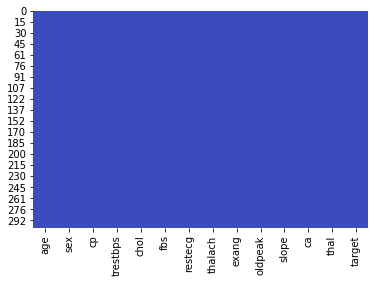

In [5]:
sns.heatmap(ds.isnull(), cbar = False, cmap = 'coolwarm')

Я исправила данные, теперь можно изменить заголовки колонок в более читабельный вид.

In [6]:
ds.columns = ['Age', 'Sex', 'Chest Pain Type',
              'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar',
              'Rest ECG', 'Max Heart Rate Achieved', 'Exercise Induced Angina',
              'ST Depression', 'ST Slope', 'Number Major Vessels',
              'Thalassemia', 'Heart Disease']

ds.replace({'Sex':{0:'Female', 1:'Male'},
            'Chest Pain Type':{0:'Asymptomatic', 1:'Atypical Angina', 2:'Non-Anginal Pain', 3:'Typical Angina'},
            'Fasting Blood Sugar':{1:'> 120 mg/dl',0:'< 120 mg/dl'},
            'Rest ECG':{0:'Left Ventricular Hypertrophy', 1:'Normal', 2:'ST-T wave abnormality'},
            'Exercise Induced Angina':{1:'Yes', 0:'No'},
            'ST Slope':{0:'Downsloping', 1:'Flat', 2:'Upsloping'},
            'Thalassemia':{1:'Fixed Defect', 2:'Normal', 3:'Reversible Defect'},
            'Heart Disease':{0:'Yes', 1:'No'}}, inplace = True)
ds.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Rest ECG,Max Heart Rate Achieved,Exercise Induced Angina,ST Depression,ST Slope,Number Major Vessels,Thalassemia,Heart Disease
0,63,Male,Typical Angina,145,233,> 120 mg/dl,Left Ventricular Hypertrophy,150,No,2.3,Downsloping,0,Fixed Defect,No
1,37,Male,Non-Anginal Pain,130,250,< 120 mg/dl,Normal,187,No,3.5,Downsloping,0,Normal,No
2,41,Female,Atypical Angina,130,204,< 120 mg/dl,Left Ventricular Hypertrophy,172,No,1.4,Upsloping,0,Normal,No
3,56,Male,Atypical Angina,120,236,< 120 mg/dl,Normal,178,No,0.8,Upsloping,0,Normal,No
4,57,Female,Asymptomatic,120,354,< 120 mg/dl,Normal,163,Yes,0.6,Upsloping,0,Normal,No


Проведу анализ влияния возраста (Age) на другие переменные.

In [7]:
sns.set(rc = {'figure.figsize':(8,6)}, style = 'dark', palette = "Reds_d")

Сначала давайте посмотрим на корреляцию Age с другими переменными.

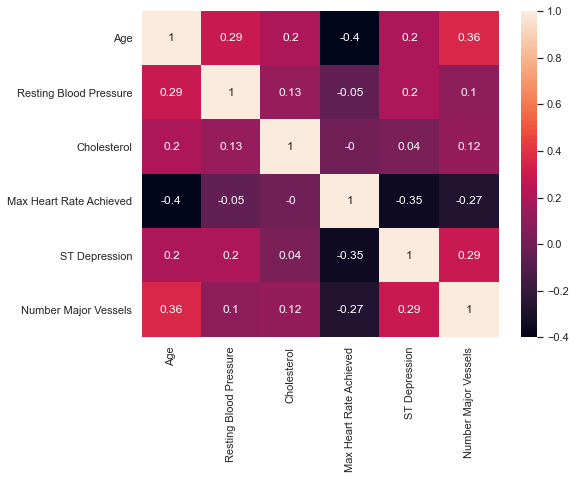

In [8]:
axes = sns.heatmap(ds.corr().round(2), annot=True)

По выведенной матрице можно сделать вывод, что возраст (Age) имеет некоторую положительную корреляцию с числом основных сосудов (Number of Major Vessels), артериальным давлением в состоянии покоя (Resting Blood Pressure), холестерином (Cholesterol) и ST депрессия (ST Depression). при увеличении значения первого параметра будет расти и второй. И отрицательная корреляция с максимальной достигнутой частотой сердечных сокращений (Max Heart Rate Achieved). То есть при увеличении значения первого параметра значение второго параметра уменьшается.
Чем ближе значение корреляции к нулю, тем меньше параметры влияют друг на друга.

Посмотрим сколько человек мужского и женского пола представлены в данных.

In [9]:
ds.groupby('Sex').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,95.0,55.71,9.46,34.0,49.5,57.0,63.0,76.0
Male,201.0,53.97,8.84,29.0,47.0,55.0,60.0,77.0


Попробуем выявить зависимость между возрастом (Age) и всеми переменными, которые показали положительное значение корреляции.

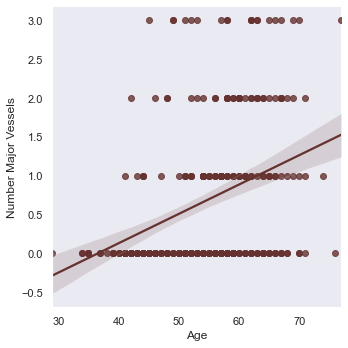

In [10]:
axes = sns.lmplot(data = ds, x = 'Age', y = 'Number Major Vessels')

,count,mean,std,min,25%,50%,75%,max
Number Major Vessels,,,,,,,,
0,173.0,51.64,9.23,29.0,44.00,52.0,58.00,76.0
1,65.0,57.48,6.88,41.0,54.00,57.0,61.00,74.0
2,38.0,59.79,6.58,42.0,58.00,60.0,64.00,71.0
3,20.0,59.90,8.23,45.0,52.75,62.0,65.25,77.0


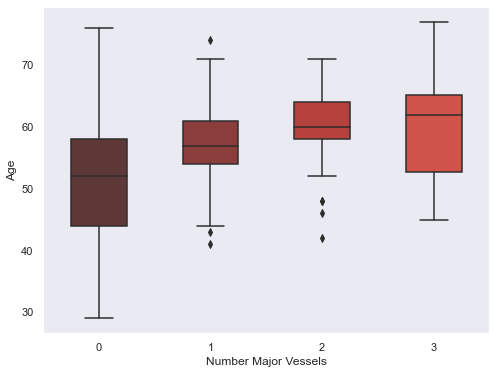

In [11]:
axes = sns.boxplot(data = ds, x = 'Number Major Vessels', y = 'Age', width = 0.5)
ds.groupby('Number Major Vessels').Age.describe().round(2)

Age не влияет на количество Number Major Vessels, как и количество Number Major Vessels на Age.

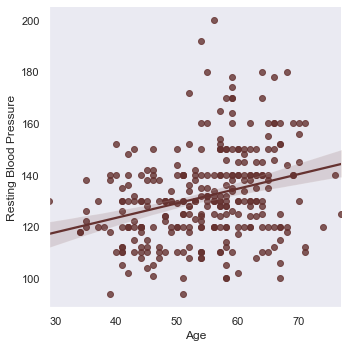

In [12]:
axes = sns.lmplot(data = ds, x = 'Age', y = 'Resting Blood Pressure')

Самое большое скопление наблюдается между 57 и 60 годами и resting blood pressure приблизительно 136.

,count,mean,std,min,25%,50%,75%,max
Cholesterol,,,,,,,,
"(125.562, 213.6]",82.0,52.487805,10.063065,29.0,44.0,53.0,60.00,76.0
"(213.6, 301.2]",171.0,54.912281,8.407169,35.0,48.5,56.0,60.50,74.0
"(301.2, 388.8]",38.0,56.105263,9.208661,39.0,51.0,57.0,63.75,77.0
"(388.8, 476.4]",4.0,61.500000,3.872983,56.0,60.5,62.5,63.50,65.0
"(476.4, 564.0]",1.0,67.000000,NaN,67.0,67.0,67.0,67.00,67.0


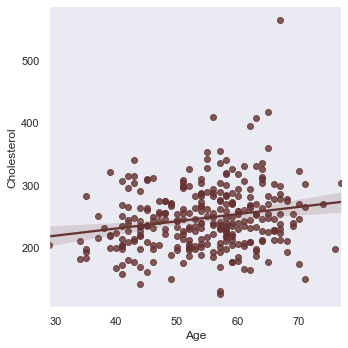

In [13]:
axes = sns.lmplot(data = ds, x = 'Age', y = 'Cholesterol')
ds.groupby(pd.cut(ds['Cholesterol'], 5))['Age'].describe()

Самое большое скопление наблюдается между 57 и 63 годами и cholesterol от 200 до 230.

,count,mean,std,min,25%,50%,75%,max
ST Depression,,,,,,,,
"(-0.0062, 1.24]",192.0,53.375000,9.100659,29.0,46.00,54.0,59.00,77.0
"(1.24, 2.48]",64.0,56.609375,8.941818,35.0,51.00,58.0,63.00,71.0
"(2.48, 3.72]",31.0,56.870968,8.433038,37.0,53.50,58.0,61.00,70.0
"(3.72, 4.96]",7.0,55.428571,8.734169,38.0,53.50,58.0,61.00,63.0
"(4.96, 6.2]",2.0,58.500000,4.949747,55.0,56.75,58.5,60.25,62.0


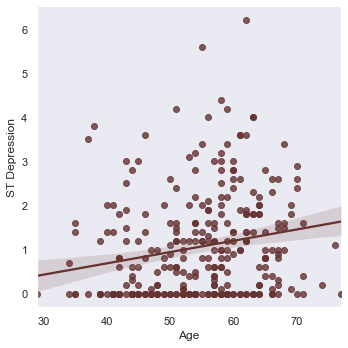

In [14]:
axes = sns.lmplot(data = ds, x = 'Age', y = 'ST Depression')
ds.groupby(pd.cut(ds['ST Depression'], 5))['Age'].describe()

Почти все возрасты имеют ST Depression = 0.

Посмотрим и на зависимость между возрастом (Age) и переменной с отрицательным значением корреляции (Max Heart Rate Achieved).

,count,mean,std,min,25%,50%,75%,max
Max Heart Rate Achieved,,,,,,,,
"(70.869, 97.2]",7.0,60.285714,4.608481,53.0,58.0,60.0,63.00,67.0
"(97.2, 123.4]",36.0,58.111111,8.671061,40.0,54.0,57.0,64.25,76.0
"(123.4, 149.6]",86.0,56.965116,8.168012,35.0,51.0,58.0,63.00,71.0
"(149.6, 175.8]",136.0,53.977941,8.530961,34.0,48.0,54.0,60.00,77.0
"(175.8, 202.0]",31.0,44.677419,7.533866,29.0,40.0,44.0,49.50,63.0


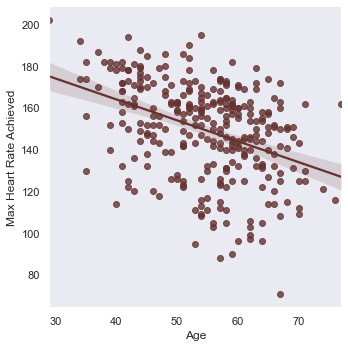

In [15]:
axes = sns.lmplot(data = ds, x = 'Age', y = 'Max Heart Rate Achieved')
ds.groupby(pd.cut(ds['Max Heart Rate Achieved'], 5))['Age'].describe()

Проверим оставшиеся переменные (Chest Pain Type, Fasting Blood Sugar, Rest ECG, Exercise Induced Angina, ST Slope, Thalassemia, Heart Disease).

,count,mean,std,min,25%,50%,75%,max
Chest Pain Type,,,,,,,,
Asymptomatic,141.0,55.81,8.30,35.0,51.0,57.0,62.0,77.0
Atypical Angina,49.0,51.22,9.56,29.0,44.0,52.0,57.0,74.0
Non-Anginal Pain,83.0,53.92,9.33,37.0,47.0,54.0,60.5,76.0
Typical Angina,23.0,55.87,10.03,34.0,51.5,59.0,63.5,69.0


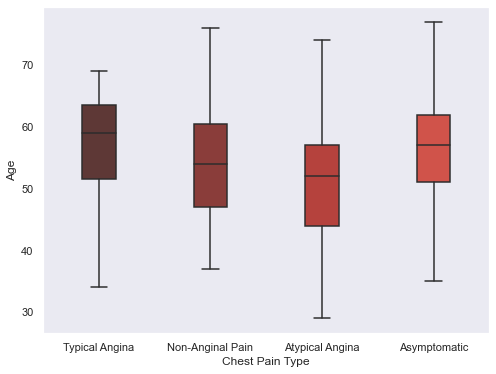

In [16]:
axes = sns.boxplot(data = ds, x = 'Chest Pain Type', y = 'Age', width = 0.3)
ds.groupby('Chest Pain Type').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Fasting Blood Sugar,,,,,,,,
< 120 mg/dl,253.0,54.03,9.30,29.0,46.0,55.0,61.0,77.0
> 120 mg/dl,43.0,57.44,6.84,42.0,53.0,58.0,62.0,71.0


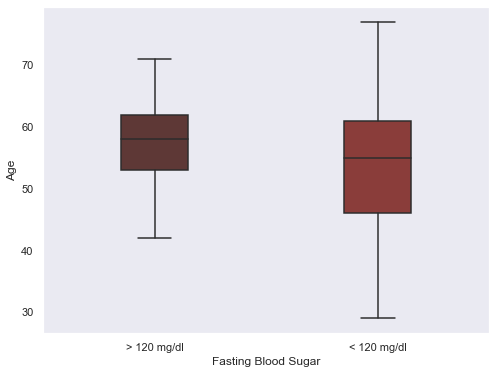

In [17]:
axes = sns.boxplot(data= ds, x = 'Fasting Blood Sugar', y = 'Age', width = 0.3)
ds.groupby('Fasting Blood Sugar').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Rest ECG,,,,,,,,
Left Ventricular Hypertrophy,145.0,55.79,8.67,29.0,51.0,57.0,62.0,77.0
Normal,147.0,53.10,9.21,34.0,45.0,54.0,60.0,71.0
ST-T wave abnormality,4.0,61.00,10.10,55.0,55.0,56.5,62.5,76.0


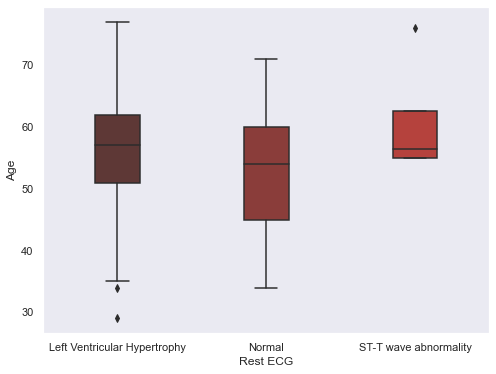

In [18]:
axes = sns.boxplot(data= ds, x = 'Rest ECG', y = 'Age', width = 0.3)
ds.groupby('Rest ECG').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Exercise Induced Angina,,,,,,,,
No,199.0,53.90,9.35,29.0,46.0,54.0,61.0,76.0
Yes,97.0,55.79,8.34,35.0,51.0,57.0,61.0,77.0


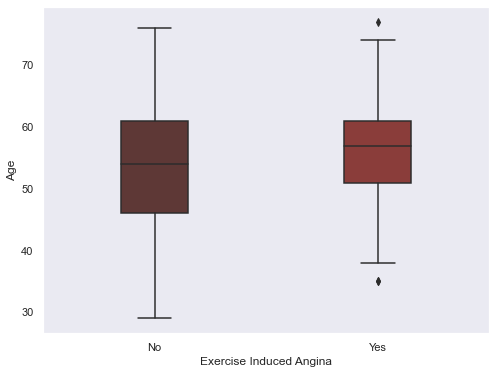

In [19]:
axes = sns.boxplot(data= ds, x = 'Exercise Induced Angina', y = 'Age', width = 0.3)
ds.groupby('Exercise Induced Angina').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
ST Slope,,,,,,,,
Downsloping,21.0,55.38,8.32,37.0,53.0,56.0,62.0,70.0
Flat,137.0,56.21,8.45,35.0,51.0,57.0,62.0,76.0
Upsloping,138.0,52.72,9.46,29.0,45.0,52.5,59.0,77.0


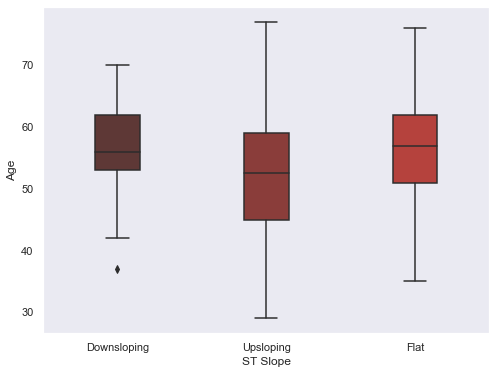

In [20]:
axes = sns.boxplot(data = ds, x = 'ST Slope', y = 'Age', width = 0.3)
ds.groupby('ST Slope').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Thalassemia,,,,,,,,
Fixed Defect,18.0,56.67,7.65,41.0,56.0,57.5,62.0,66.0
Normal,163.0,53.44,9.80,29.0,45.0,54.0,61.0,77.0
Reversible Defect,115.0,55.72,7.96,35.0,51.5,57.0,61.0,70.0


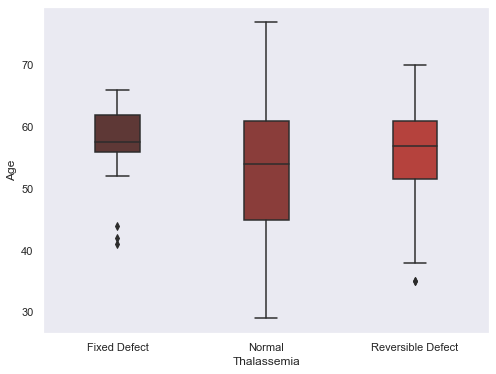

In [21]:
axes = sns.boxplot(data= ds, x = 'Thalassemia', y = 'Age', width = 0.3)
ds.groupby('Thalassemia').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Heart Disease,,,,,,,,
No,160.0,52.64,9.55,29.0,44.75,52.0,59.0,76.0
Yes,136.0,56.74,7.92,35.0,52.75,58.0,62.0,77.0


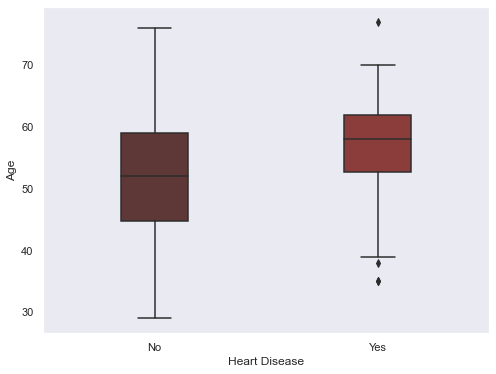

In [22]:
axes = sns.boxplot(data = ds, x = 'Heart Disease', y = 'Age', width = 0.3)
ds.groupby('Heart Disease').Age.describe().round(2)

По полученным данным из рассмотренных выше графиков, можно сказать, что возраст (Age) оказывает некоторое слабое влияние на остальные переменные.

## Analysing the cause of Heart Disease
Проанализируем причину сердечных заболеваний.

,count,mean,std,min,25%,50%,75%,max
Heart Disease,,,,,,,,
No,160.0,52.64,9.55,29.0,44.75,52.0,59.0,76.0
Yes,136.0,56.74,7.92,35.0,52.75,58.0,62.0,77.0


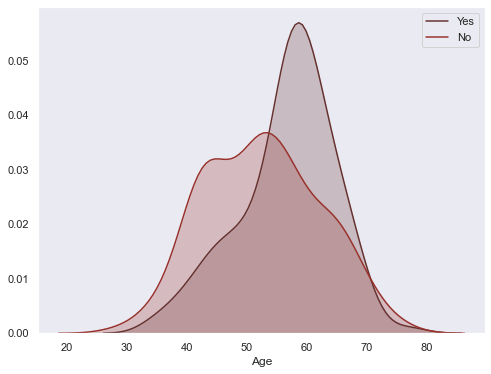

In [23]:
impacts = []
axes = sns.kdeplot(ds[ds['Heart Disease'] == 'Yes']['Age'], shade = True)
axes = sns.kdeplot(ds[ds['Heart Disease'] == 'No']['Age'], shade = True)
axes = axes.set_xlabel('Age')
axes = plt.legend(['Yes','No'])


ds.groupby('Heart Disease').Age.describe().round(2)

По графику видно, что сердечные заболевания чаще встречаются у людей возраста около 60 лет.

In [24]:
impacts.append('Age')

Посмотрим как зависит наличие болезни от пола человека.

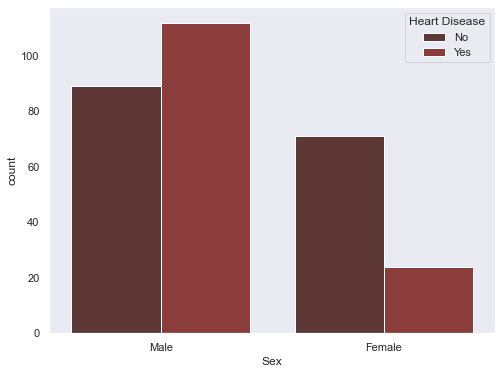

In [25]:
axes = sns.countplot(data = ds, x = 'Sex', hue = 'Heart Disease')

In [26]:
print(round(len(ds[(ds['Sex'] == 'Male') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Sex'] == 'Male')]), 2))
print(round(len(ds[(ds['Sex'] == 'Female') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Sex'] == 'Female')]), 2))

0.56
0.25


У мужчин болезнь сердца встречается чаще.

In [27]:
impacts.append('Sex')

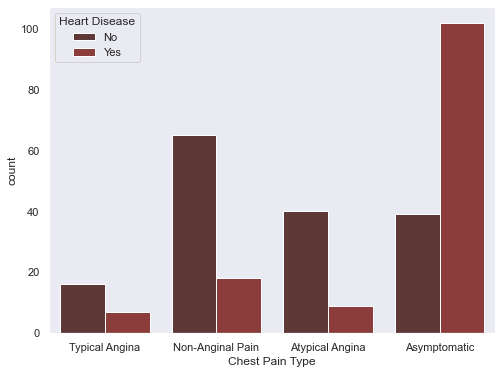

In [28]:
axes = sns.countplot(data = ds, x = 'Chest Pain Type', hue = 'Heart Disease')

Судя по полученному графику, люди с бессимптомной болью в груди (Chest Pain: Asymptomatic) чаще имеют сердечное заболевание.
Добавим этот фактор в список переменных impacts, оказывающих влияние на наличие сердечной болезни.

In [29]:
impacts.append('Chest Pain Type')

,count,mean,std,min,25%,50%,75%,max
Heart Disease,,,,,,,,
No,160.0,129.18,16.37,94.0,120.0,130.0,140.0,180.0
Yes,136.0,134.46,18.86,100.0,120.0,130.0,145.0,200.0


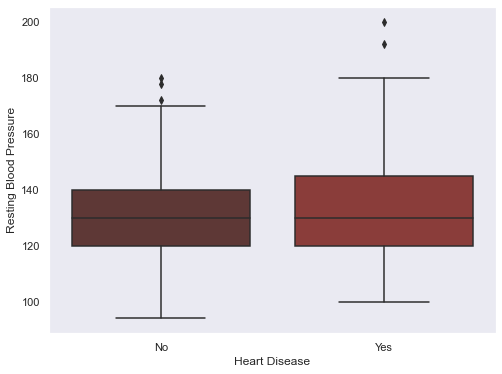

In [30]:
axes = sns.boxplot(data = ds, x = 'Heart Disease', y = 'Resting Blood Pressure')
ds.groupby('Heart Disease')['Resting Blood Pressure'].describe().round(2)

Resting Blood Presure не влияет на болезнь сердца (Heart Disease).

,count,mean,std,min,25%,50%,75%,max
Heart Disease,,,,,,,,
No,160.0,243.49,53.76,126.0,208.75,235.5,268.25,564.0
Yes,136.0,251.46,49.65,131.0,217.75,251.0,283.25,409.0


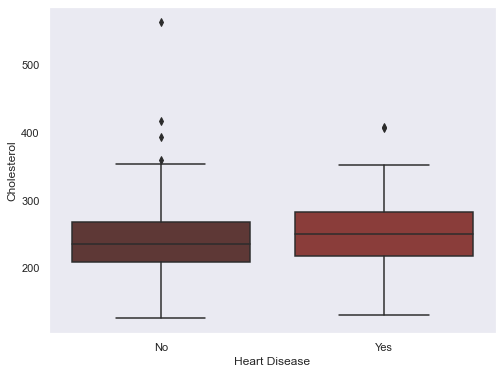

In [31]:
axes = sns.boxplot(data = ds, x = 'Heart Disease', y = 'Cholesterol')
ds.groupby('Heart Disease')['Cholesterol'].describe().round(2)

Холестерин (Cholesterol) не влияет на болезнь сердца. 

Проверим уровень сахара в крови натощак (Fasting Blood Sugar) на зависимость между наличием болезни сердца.

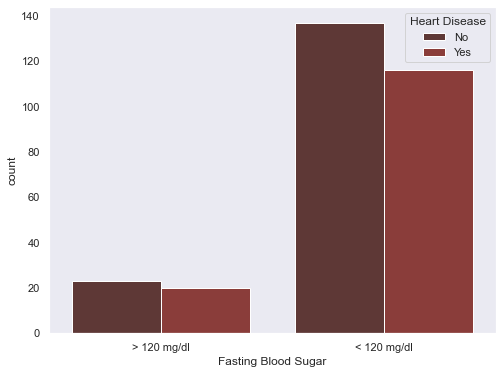

In [32]:
axes = sns.countplot(data = ds, x = 'Fasting Blood Sugar', hue = 'Heart Disease')

In [33]:
print(len(ds[(ds['Fasting Blood Sugar'] == '> 120 mg/dl') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Fasting Blood Sugar'] == '> 120 mg/dl')]))
print(len(ds[(ds['Fasting Blood Sugar'] == '< 120 mg/dl') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Fasting Blood Sugar'] == '< 120 mg/dl')]))

0.46511627906976744
0.45849802371541504


Никакой статистической разницы не наблюдается.

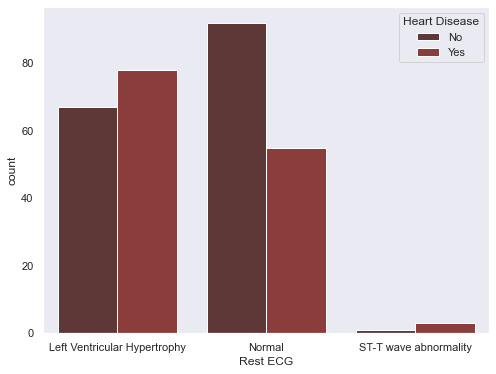

In [34]:
axes = sns.countplot(data = ds, x = 'Rest ECG', hue = 'Heart Disease')

In [35]:
print(len(ds[(ds['Rest ECG'] == 'Left Ventricular Hypertrophy') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Rest ECG'] == 'Left Ventricular Hypertrophy')]))
print(len(ds[(ds['Rest ECG'] == 'Normal') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Rest ECG'] == 'Normal')]))
print(len(ds[(ds['Rest ECG'] == 'ST-T wave abnormality') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Rest ECG'] == 'ST-T wave abnormality')]))

0.5379310344827586
0.3741496598639456
0.75


Пропорционально ЭКГ покоя (Rest EСG): у аномалий волны ST-T (ST-T wave abnormality) встречается больше сердечных заболеваний.
Добавим ее всписок переменных, оказывающих влияние на наличие сердечной болезни.

In [36]:
impacts.append('Rest ECG')

,count,mean,std,min,25%,50%,75%,max
Heart Disease,,,,,,,,
No,160.0,158.58,19.04,96.0,149.0,161.0,172.00,202.0
Yes,136.0,138.95,22.72,71.0,125.0,141.5,156.25,195.0


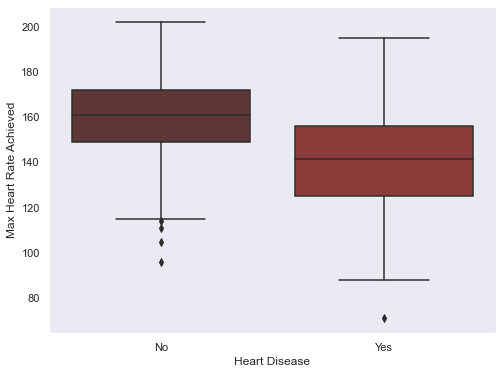

In [37]:
axes = sns.boxplot(data = ds, x = 'Heart Disease', y = 'Max Heart Rate Achieved')
ds.groupby('Heart Disease')['Max Heart Rate Achieved'].describe().round(2)

Максимальная достигнутая частота сердечных сокращений (Max Heart Rate Achieved) имеет более низкие значения для сердечной болезни.

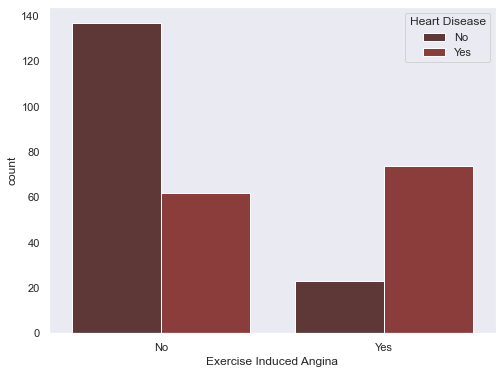

In [38]:
axes = sns.countplot(data = ds, x = 'Exercise Induced Angina', hue = 'Heart Disease')

In [39]:
print(len(ds[(ds['Exercise Induced Angina'] == 'No') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Exercise Induced Angina'] == 'No')]))
print(len(ds[(ds['Exercise Induced Angina'] == 'Yes') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Exercise Induced Angina'] == 'Yes')]))

0.31155778894472363
0.7628865979381443


Вызванная физическими упражнениями стенокардия (Exercise Induced Angina) имеет больше болезней сердца.

In [40]:
impacts.append('Exercise Induced Angina')

,count,mean,std,min,25%,50%,75%,max
Heart Disease,,,,,,,,
No,160.0,0.6,0.79,0.0,0.0,0.2,1.10,4.2
Yes,136.0,1.6,1.30,0.0,0.6,1.4,2.52,6.2


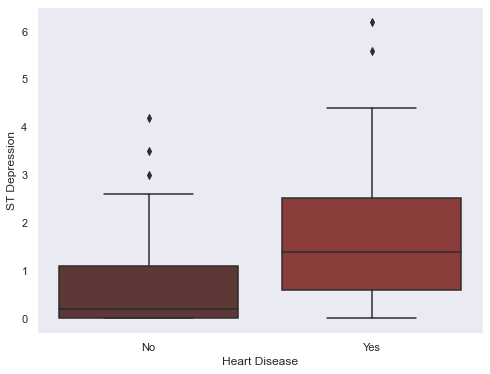

In [41]:
axes = sns.boxplot(data = ds, x = 'Heart Disease', y = 'ST Depression')
ds.groupby('Heart Disease')['ST Depression'].describe().round(2)

ST Depression имеет более высокие значения для сердечно-сосудистых заболеваний.

In [42]:
impacts.append('ST Depression')

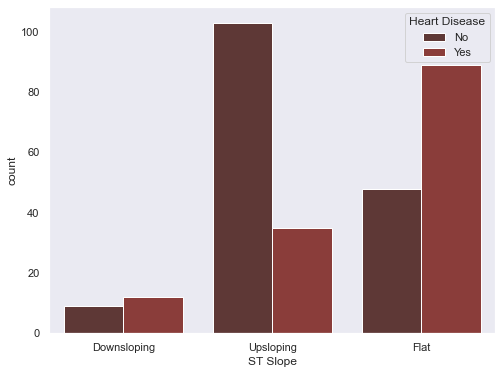

In [43]:
axes = sns.countplot(data = ds, x = 'ST Slope', hue = 'Heart Disease')

In [44]:
print(len(ds[(ds['ST Slope'] == 'Downsloping') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['ST Slope'] == 'Downsloping')]))
print(len(ds[(ds['ST Slope'] == 'Upsloping') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['ST Slope'] == 'Upsloping')]))
print(len(ds[(ds['ST Slope'] == 'Flat') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['ST Slope'] == 'Flat')]))

0.5714285714285714
0.2536231884057971
0.6496350364963503


Судя по графику и полученным значениям, ST Slope типа Flat имеет больше сердечных заболеваний.

In [45]:
impacts.append('ST Slope')

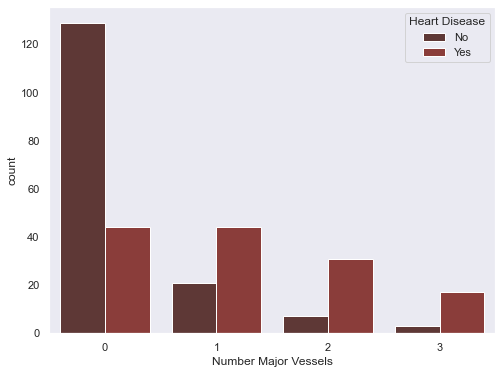

In [46]:
axes = sns.countplot(data = ds, x = 'Number Major Vessels', hue = 'Heart Disease')

In [47]:
print(len(ds[(ds['Number Major Vessels'] == 3) & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Number Major Vessels'] == 3)]))
print(len(ds[(ds['Number Major Vessels'] == 2) & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Number Major Vessels'] == 2)]))
print(len(ds[(ds['Number Major Vessels'] == 1) & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Number Major Vessels'] == 1)]))
print(len(ds[(ds['Number Major Vessels'] == 0) & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Number Major Vessels'] == 0)]))

0.85
0.8157894736842105
0.676923076923077
0.2543352601156069


Количество основных сосудов (Number Major Vessels), равное 3 and 2 оказывают большее влияние на наличие сердечных заболеваний.

In [48]:
impacts.append('Number Major Vessels')

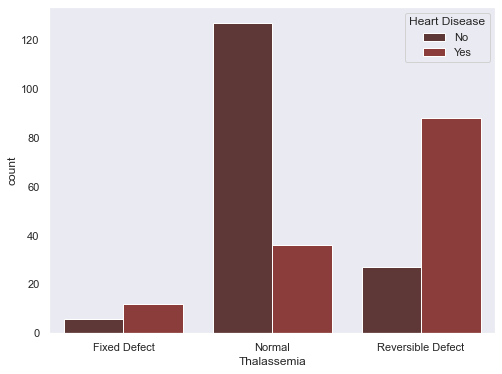

In [49]:
ax = sns.countplot(data = ds, x = 'Thalassemia', hue = 'Heart Disease')

In [50]:
print(len(ds[(ds['Thalassemia'] == 'Fixed Defect') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Thalassemia'] == 'Fixed Defect')]))
print(len(ds[(ds['Thalassemia'] == 'Normal') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Thalassemia'] == 'Normal')]))
print(len(ds[(ds['Thalassemia'] == 'Reversible Defect') & (ds['Heart Disease'] == 'Yes')]) / len(ds[(ds['Thalassemia'] == 'Reversible Defect')]))

0.6666666666666666
0.22085889570552147
0.7652173913043478


Талассемия (Thalassemia) обратимого дефекта (Reversible Defect) имеет больше сердечных заболеваний.

Таким образом, можно сказать, какие переменные влияют на наличие болезни сердца:

In [51]:
print(impacts)

['Age', 'Sex', 'Chest Pain Type', 'Rest ECG', 'Exercise Induced Angina', 'ST Depression', 'ST Slope', 'Number Major Vessels']


Удалим колонки, которые не влияют на наличие сердечной болезни.

In [52]:
ds.drop(['Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar'], axis = 1, inplace = True)
y = ds['Heart Disease']

ds.drop(['Heart Disease'], axis = 1, inplace = True)

x = ds


In [53]:
y.replace({'Heart Disease':{'Yes':1, 'No':0}}, inplace = True)

In [54]:
x = pd.get_dummies(x)

Модель классификации - логистическая регрессия (Logistic Regression).
В машинном обучении классификация - это контролируемый подход к обучению, который пытается выяснить взаимосвязь между набором характеристических переменных и целевой переменной. Целевой атрибут в классификации - это категориальная переменная с дискретными значениями.

Логистическая регрессия - это алгоритм классификации категориальных переменных. Логистическая регрессия аналогична линейной регрессии, но пытается предсказать категориальное или дискретное целевое поле, такое как 0 или 1, да или нет и т. д., вместо числового.

Разделим данные на тренировочные и тестировочные.

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print ('Train set:  ', x_train.shape,  y_train.shape)
print ('Test set:   ', x_test.shape,  y_test.shape)

Train set:   (236, 21) (236,)
Test set:    (60, 21) (60,)


Нормализуем данные. Затем получим значение кросс-валидации и построим модель по тренировочным данным. Потом составим матрицу ошибок.

Accuracy: 0.83 (+/- 0.05)
Test score: 0.88


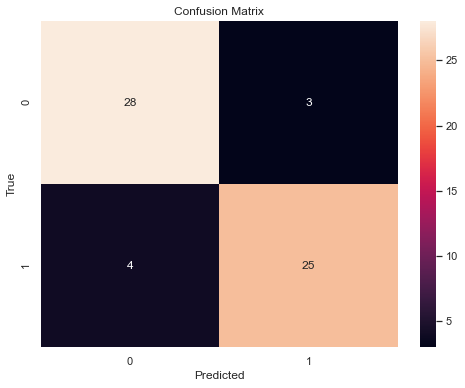

In [56]:
from sklearn import preprocessing

x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)
model = LogisticRegression(class_weight = 'balanced', tol = 1e-10)


scores = cross_val_score(model, x_train, y_train, cv = 5, scoring='accuracy')
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

model.fit(x_train, y_train)
print("Test score: {:.2f}".format(accuracy_score(y_test, model.predict(x_test))))


axes = sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot = True)
axes = axes.set(xlabel = 'Predicted', ylabel = 'True', title = 'Confusion Matrix')

Все правильные прогнозы расположены по диагонали таблицы.
То есть на предсказанное наличие болезни (правильно 25 раз) будет приходится всего 3 ошибки. А на предсказанное отсутствие болезни приходится правильных 28 ответов и 4 ошибки.
Таким образом, с точностью в 88% наша модель будет предсказывать наличие заболевания сердца, это вполне хороший результат.

### Второй датасет

Вторым датасетом я выбрала простой и понятный датасет качества красного вина. Этот набор данных должен отлично подойти для регрессионного или классификационного моделирования.

Импортируем необходимые библиотеки.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

Считаем надбор данных и выведем первые 5 строк.

In [58]:
ds2 = pd.read_csv('/Users/linuxoid/Desktop/VUZICH/ML/input_data/winequality-red.csv')
ds2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Проверка на наличие пропущенных данных.

In [59]:
ds2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

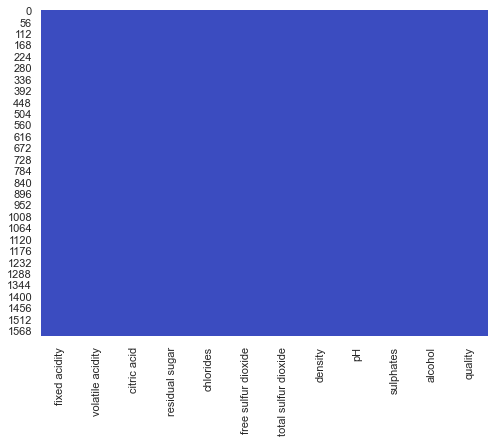

In [60]:
sns.heatmap(ds2.isnull(), cbar = False, cmap='coolwarm')

Повезло, пропущенных данных нет. Насколько мне известно, такое случается редко!

In [61]:
#Input variables (based on physicochemical tests):
#    1 - fixed acidity        - фиксированная кислотность
#    2 - volatile acidity     - летучая кислотность
#    3 - citric acid          - лимонная кислота
#    4 - residual sugar       - остаточный сахар
#    5 - chlorides            - хлориды
#    6 - free sulfur dioxide  - свободный диоксид серы
#    7 - total sulfur dioxide - общий диоксид серы
#    8 - density              - плотность
#    9 - pH                   - водородный показатель(кислотность среды pH)
#    10 - sulphates           - сульфаты
#    11 - alcohol             - алкоголь
#Output variable:
#    12 - quality (score between 0 and 10) - качество (0 - 10)

ds2.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [62]:
print("Number of unique values in each column:\n")
for i in ds2.columns:
    print(i, len(ds2[i].unique()))

Number of unique values in each column:

fixed acidity 96
volatile acidity 143
citric acid 80
residual sugar 91
chlorides 153
free sulfur dioxide 60
total sulfur dioxide 144
density 436
pH 89
sulphates 96
alcohol 65
quality 6


Создадим бинарную классификацию качества вина. Плохое вино, если качество < 6.5 и хорошее соответственно > 6.5.

bad: quality < 6.5
good: quality > 6.5

In [63]:
ds2['bin_quality'] = pd.cut(ds2['quality'], bins = [0, 6.5, 10], labels = ['bad', 'good'])

Проверим произошедшие изменения.

In [64]:
ds2.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bin_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,bad


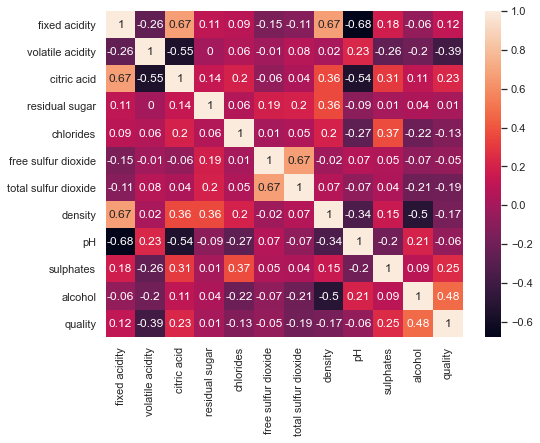

In [65]:
sns.set(rc = {'figure.figsize':(8,6)}, style = 'dark', palette = "Reds_d")
axes = sns.heatmap(ds2.corr().round(2), annot=True)

Положительная корреляция наблюдается с alcohol = 0.48, sulphates = 0.25, citric acid = 0.23, fixed acidity = 0.12 и residual sugar = 0.01. Положительная корреляция означает, что при увеличении значения первого параметра будет расти и второй. Хотелось бы отметить максимальную положительную корреляцию имеет fixed acidity и density, fixed acidity и citric acid, а также free sulfur dioxide и total sulfur dioxide. Например, с более высоким содержанием кислоты в красном вине, вино имеет более высокую плотность, так как сами кислоты более плотные, чем вода.

Отрицательная корреляция означает, что при увеличении значения первого параметра значение второго параметра уменьшается. Например, при более высоком содержании кислоты в красном вине значение pH будет ниже, что указывает на кислотную среду (fixed acidity и pH).
Так как отрицательных значений оказалось больше, но они имееют значения близкие к 0, то буду рассматривать переменные с наибольшим отрицательным значением. Это volatile acidity = -0.39. Также мое внимание привлекли (fixed acidity и pH) = -0.68, (citric acid и pH) = -0.54, (citric acid и volatile acidity) = -0.55, (alcohol и density) = -0.5

Чем ближе значение корреляции к нулю, тем меньше параметры влияют друг на друга.

Попробуем выявить зависимость между качеством (quality) и всеми переменными, которые показали положительное значение корреляции.

Начнем с fixed acidity.

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
"(2.995, 4.0]",63.0,7.871429,1.649284,4.6,6.80,7.50,8.400,12.5
"(4.0, 5.0]",681.0,8.167254,1.563988,5.0,7.10,7.80,8.900,15.9
"(5.0, 6.0]",638.0,8.347179,1.797849,4.7,7.00,7.90,9.400,14.3
"(6.0, 7.0]",199.0,8.872362,1.992483,4.9,7.40,8.80,10.100,15.6
"(7.0, 8.0]",18.0,8.566667,2.119656,5.0,7.25,8.25,10.225,12.6


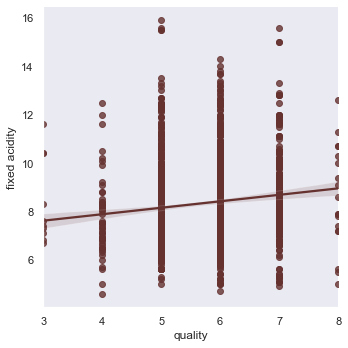

In [66]:
axes = sns.lmplot(data = ds2, x = 'quality', y = 'fixed acidity')
ds2.groupby(pd.cut(ds2['quality'], 5))['fixed acidity'].describe()

По такому графику трудно что-то сказать, но видно уплотнение по оси fixed acidity в промежутке от 6 до 12.

Напишем функцию, которая будет строить два графика barplot и один displot по заданным параметрам.

In [67]:
def drawing_graphics(column, ylims):
    fig = plt.figure(figsize=(14, 12))
    gs = gridspec.GridSpec(2, 2)
    ax0 = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 1])
    
    sns.distplot(ds2[ds2.columns[column]], kde=False, ax=ax0)
    sns.barplot('quality', ds2.columns[column], data=ds2, ax=ax1)
    sns.barplot('bin_quality', ds2.columns[column], data=ds2, ax=ax2)
    ax1.set_ylim(ylims[0], ylims[1])
    ax2.set_ylim(ylims[0], ylims[1])
    ax1.set_yticks(np.linspace(ylims[0], ylims[1], 11))
    ax2.set_yticks(np.linspace(ylims[0], ylims[1], 11))
    ax1.yaxis.grid()
    ax2.yaxis.grid()
    ax1.set_axisbelow(True)
    ax2.set_axisbelow(True)

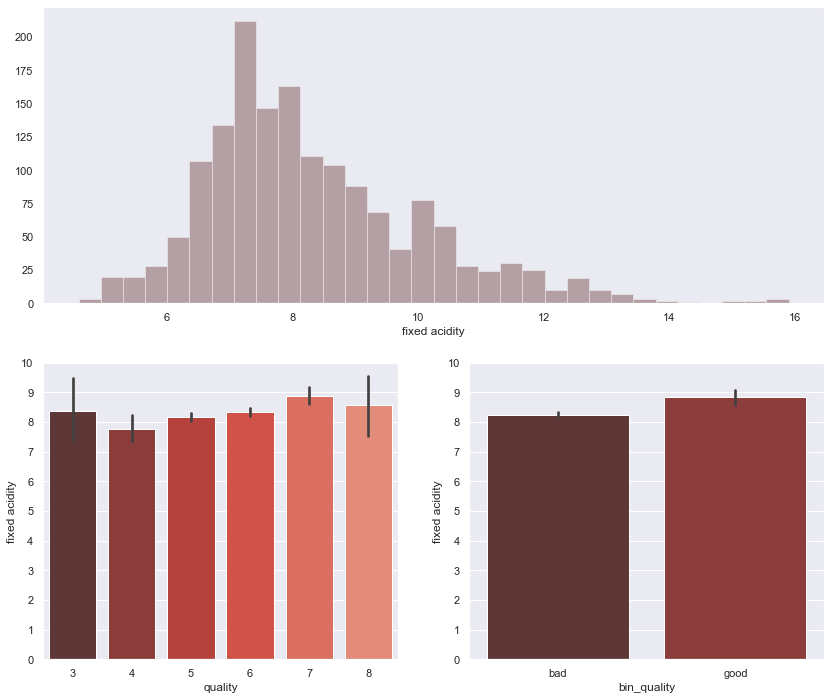

In [68]:
drawing_graphics(0, [0, 10])

С ростом fixed acidity преобладает хорошее качества вина с разрывом на 0.6. Это небольшой показатель. Также на 2 графике видно большое содержание fixed acidity, но при этом качество вина оценено на 3, и одновременно при таком же количестве fixed acidity есть вино оцененное на 6. Также на качество равное 8 при fixed acility чуть большем, чем при оценке 3. Поэтому я не могу сказать, что fixed acidity повысит качество вина с его увеличением.

Приступим к рассмотрению следующей переменной citric acid.

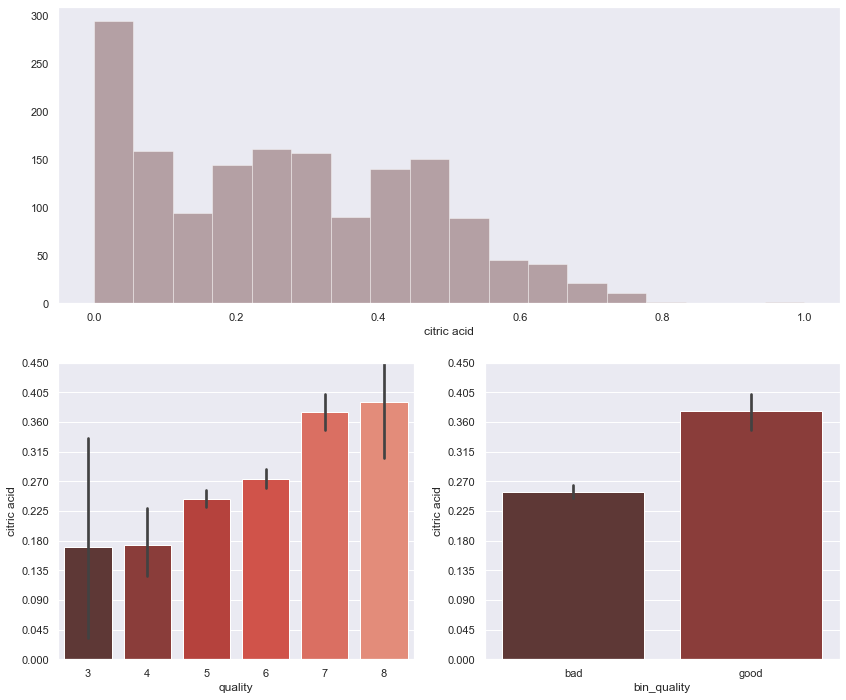

In [69]:
drawing_graphics(2, [0, 0.45])

Благодаря предыдущей бинарной классификации качества можно с легкостью сказать, что здесь более большой отрыв хорошего качества от плохого. Это значит, что действительно citric acid влияет на качество вина.

Далее рассмотрим residual sugar.

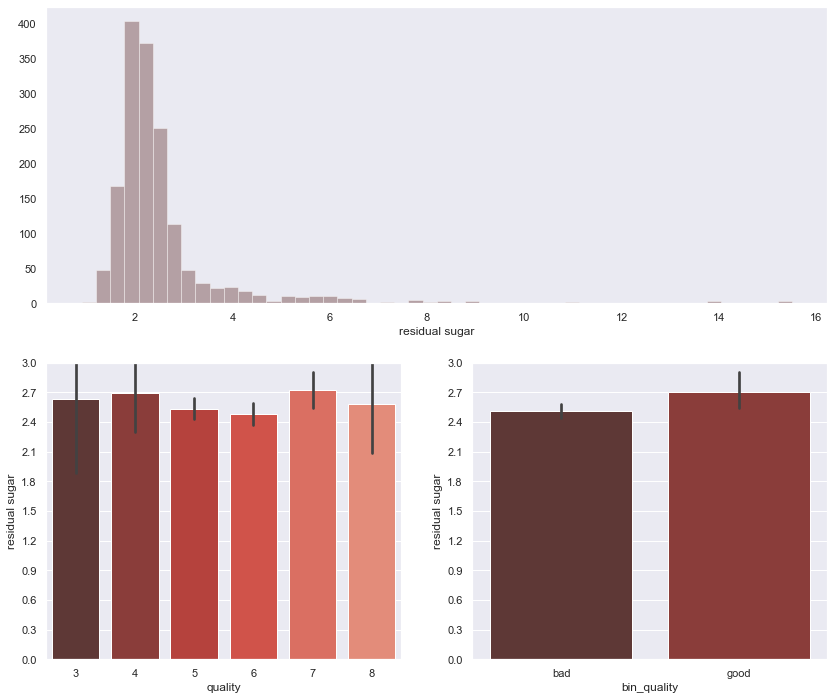

In [70]:
drawing_graphics(3, [0, 3])

Хорошее качество вина отличается от плохого на 0.2. Это довольно-таки маленькая величина, нельзя с точностью сказать, что увеличение residual sugar сделает качество вина выше. Тем более на 2 графике видно, что с увеличением residual sugar не всегда повышается качество.

Рассмотрим sulphates.

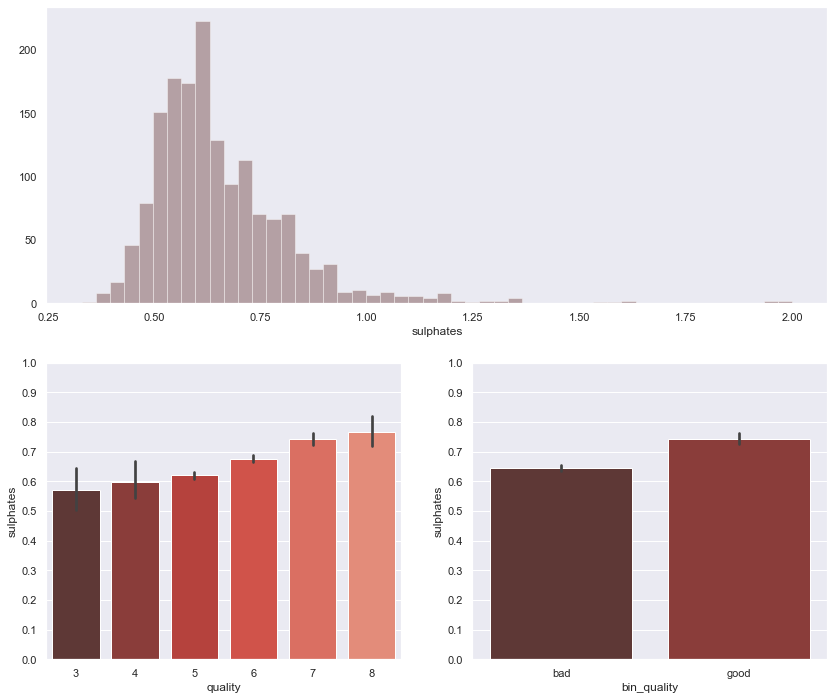

In [71]:
drawing_graphics(9, [0, 1])

Изучив графики, можно утверждать, что действительно при наибольшем количество sulphates качество вина возрастает.

На очереди переменная alcohol.

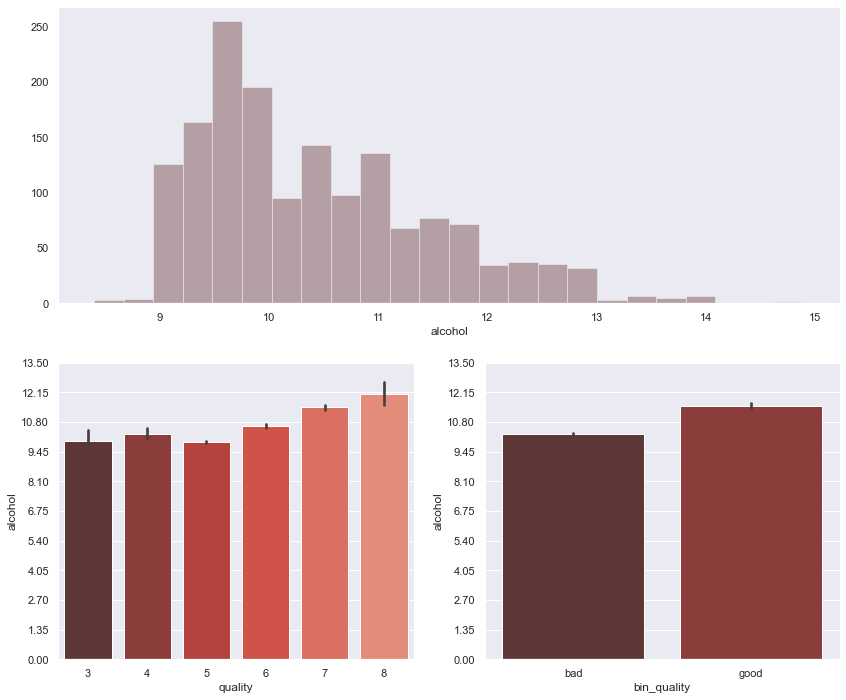

In [72]:
drawing_graphics(10, [0, 13.5])

Рассматривая второй график, видно, что величины растут вполне равномерно (исключение - это столбец качества = 5), и по 3 графику имеется большой отрыв между плохим и хорошим качеством.

Теперь хотелось бы проанализировать переменные, которые показали отрицательную корреляцию.

Начну с volatile acidity, которая показала отрицательное значение корреляции с quality.

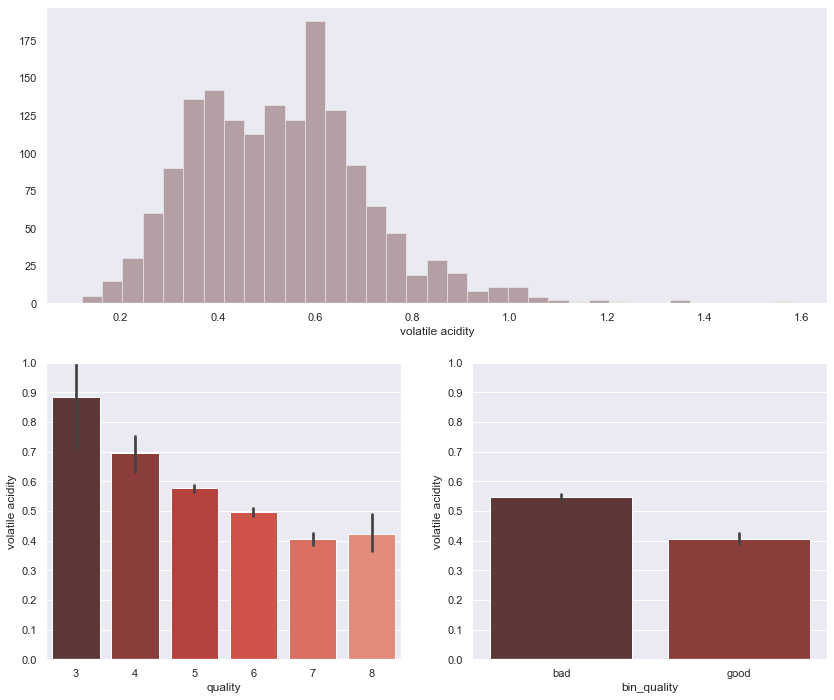

In [73]:
drawing_graphics(1, [0, 1])

По графикам видно, что при уменьшении volatile acidity будет возрастать quality. Следовательно эта переменная действительно влияет на качество вина.

,count,mean,std,min,25%,50%,75%,max
fixed acidity,,,,,,,,
"(4.589, 6.86]",274.0,3.477591,0.138268,3.10,3.38,3.460,3.56,4.01
"(6.86, 9.12]",913.0,3.319168,0.119641,2.89,3.25,3.320,3.39,3.69
"(9.12, 11.38]",298.0,3.208154,0.108685,2.74,3.15,3.210,3.27,3.50
"(11.38, 13.64]",102.0,3.130784,0.092144,2.88,3.07,3.130,3.19,3.38
"(13.64, 15.9]",12.0,2.986667,0.072027,2.86,2.92,2.995,3.06,3.07


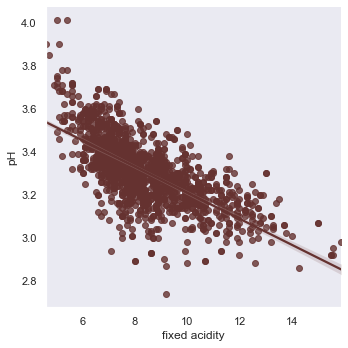

In [74]:
axes = sns.lmplot(data = ds2, x = 'fixed acidity', y = 'pH')
ds2.groupby(pd.cut(ds2['fixed acidity'], 5))['pH'].describe()

По данному графику можно сказать, что распределение этих двух величин наиболее плотно при fixed acidity от 6 до 9, при этом pH принимает значения от 3.2 до 3.65, при уменьшении pH увеличивается и fixed acidity. Но учитывая, что выше мы выяснили, что fixed acidity слабо влияет на качество вина, то и pH, влияющий на fixed acidity тоже мало влияет на качество вина.

,count,mean,std,min,25%,50%,75%,max
citric acid,,,,,,,,
"(-0.001, 0.2]",631.0,3.395246,0.144033,2.87,3.31,3.38,3.48,4.01
"(0.2, 0.4]",525.0,3.296990,0.124691,2.89,3.23,3.29,3.37,3.78
"(0.4, 0.6]",365.0,3.222137,0.124010,2.92,3.14,3.21,3.31,3.58
"(0.6, 0.8]",77.0,3.147143,0.136544,2.86,3.06,3.16,3.22,3.66
"(0.8, 1.0]",1.0,2.740000,NaN,2.74,2.74,2.74,2.74,2.74


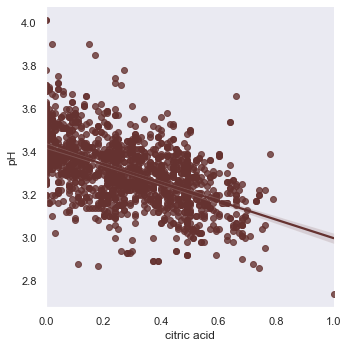

In [75]:
axes = sns.lmplot(data = ds2, x = 'citric acid', y = 'pH')
ds2.groupby(pd.cut(ds2['citric acid'], 5))['pH'].describe()

Здесь происходит та же ситуация. Распределение этих двух величин наиболее плотно при citric acid от 0 до 0.4, при этом pH принимает значения от 3.2 до 3.5, при уменьшении pH увеличивается и citric acid. Так как раннее было найдено, что citric acid влияет на качество вина, то получается, что и pH, влияющий на citric acid тоже оказывает влияние на качество вина.

,count,mean,std,min,25%,50%,75%,max
volatile acidity,,,,,,,,
"(0.119, 0.412]",478.0,0.422741,0.134675,0.0,0.33,0.425,0.50,0.78
"(0.412, 0.704]",898.0,0.225935,0.183552,0.0,0.07,0.210,0.33,1.00
"(0.704, 0.996]",199.0,0.125678,0.135726,0.0,0.02,0.090,0.21,0.68
"(0.996, 1.288]",21.0,0.158095,0.173165,0.0,0.05,0.090,0.21,0.66
"(1.288, 1.58]",3.0,0.000000,0.000000,0.0,0.00,0.000,0.00,0.00


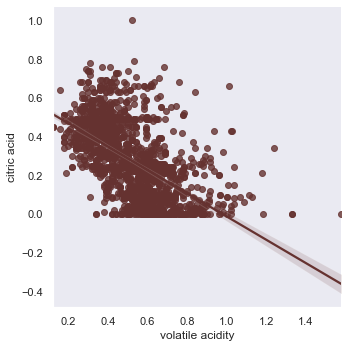

In [76]:
axes = sns.lmplot(data = ds2, x = 'volatile acidity', y = 'citric acid')
ds2.groupby(pd.cut(ds2['volatile acidity'], 5))['citric acid'].describe()

Изучив данный график, можно сказать, что распределение наиболее плотно при volatile acidity в промежутке от 0.4 до 0.7 и citric acid от 0.1 до 0.6. При увеличении volatile acidity уменьшаются значения citric acid. Тот же самый вывод напрашивается и здесь, ведь до этого было найдено, что citric acid влияет на качество вина, то выходит, что и volatile acidity , влияющий на citric acid тоже оказывает влияние на качество вина. То есть для повышения качества нам нужно уменьшать значение volatile acidity.

,count,mean,std,min,25%,50%,75%,max
alcohol,,,,,,,,
"(8.394, 9.7]",552.0,0.997506,0.001409,0.99341,0.996600,0.99730,0.998200,1.00369
"(9.7, 11.0]",639.0,0.996996,0.001527,0.99236,0.995900,0.99680,0.997935,1.00260
"(11.0, 12.3]",304.0,0.995726,0.001975,0.99064,0.994580,0.99538,0.996483,1.00320
"(12.3, 13.6]",96.0,0.994298,0.002291,0.99007,0.992890,0.99376,0.995022,1.00210
"(13.6, 14.9]",8.0,0.992548,0.002380,0.99080,0.991365,0.99160,0.992450,0.99760


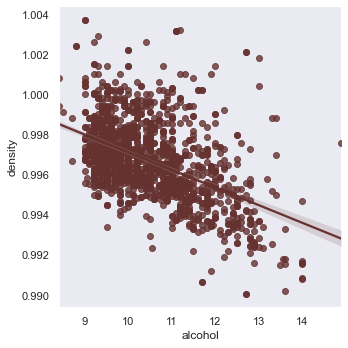

In [77]:
axes = sns.lmplot(data = ds2, x = 'alcohol', y = 'density')
ds2.groupby(pd.cut(ds2['alcohol'], 5))['density'].describe()

При увеличении alcohol уменьшается density, а при уменьшении alcohol увеличивается density. Так как alcohol влияет на качество алкоголя, то для приобретения хорошего качества вина нужно уменьшать значение density.

Таким образом, нашлись переменные, которые оказывают то или иное влияние на quality.
Это citric acid, volatile acidity, alcohol, sulpahtes, pH, density.
Удалим колонки, которые не влияют на качество вина.


In [78]:
ds2.drop(['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'quality'], axis = 1, inplace = True)

In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ds2['bin_quality'] = le.fit_transform(ds2['bin_quality'])

In [80]:
y2 = ds2['bin_quality']

ds2.drop(['bin_quality'], axis = 1, inplace = True)

x2 = ds2

#### Logistic Regression 

Разделим данные на тренировочные и тестировочные.

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
import math
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2)
print('Train set:  ', x2_train.shape,  y2_train.shape)
print('Test set:   ', x2_test.shape,  y2_test.shape)

Train set:   (1279, 6) (1279,)
Test set:    (320, 6) (320,)


Нормализуем данные.

In [82]:
sc = StandardScaler()
x2_train = sc.fit_transform(x2_train)
x2_test = sc.transform(x2_test)

Построим классификационную модель, используя логистическую регрессию.

In [83]:
model2 = LogisticRegression(class_weight = 'balanced', tol = 1e-10)

scores2 = cross_val_score(model2, x2_train, y2_train, cv = 5, scoring ='accuracy')
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores2.mean(), scores2.std() * 2))

model2.fit(x2_train, y2_train)
print("Test score: {:.2f}".format(accuracy_score(y2_test, model2.predict(x2_test))))

Accuracy: 0.79 (+/- 0.04)
Test score: 0.79


Предсказания, сгенерированные моделью.

In [84]:
predictions = model2.predict(x2_test)

In [85]:
print(classification_report(y2_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87       282
           1       0.34      0.84      0.49        38

    accuracy                           0.79       320
   macro avg       0.66      0.81      0.68       320
weighted avg       0.90      0.79      0.82       320



Получили точность 79%. Проверим кросс валидационное значение для наших предсказаний.

In [86]:
scores = cross_val_score(model2, x2_train, y2_train, cv = 10)
scores.mean()

0.7919844980314961

Получили 79%. Таким образом, наша модель будет предсказывать качество вина с точностью в 79%.

#### Вывод
Выполнив данную лабораторную работу я провела анализ данных, определила необходимые признаки для решения поставленной задачи, занималась корректировкой считанных данных. С помощью графиков визуализировала распределение и зависимости целевого признака от выбранных мною признаков. Для оценки точности предсказаний использовала логистическую регрессию. Это был интересный опыт работы с данными, тем более, что для меня он был первым.